In [1]:
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# from positivitree.positivitree import PositiviTree
from positivitree.tree_vis import visualize_leaves_static, visualize_leaves_interactive
from positivitree import PositiviTree

In [9]:
def load_NHEFS_data():
    import pandas as pd
    data = pd.read_csv("../data/nhefs.csv")
    features = [
        'sex', 'race', 'age', 'education',
        'smokeintensity', 'smokeyrs', 'exercise', 'active', 'wt71'
    ]

    # data = data[restriction_cols]
    y = data["qsmk"]
    X = data[features]

    # X = data.loc[:, data.isnull().mean(axis="index") < 0.1]
    # X.drop(columns=["wt82", "wt82_71"], inplace=True)
    # X = X.dropna()
    # y = X.pop("qsmk")
    return X, y

In [12]:
X, y = load_NHEFS_data()
y = y.replace({1: 0, 0: 1})
y.mean()

0.7372621240024555

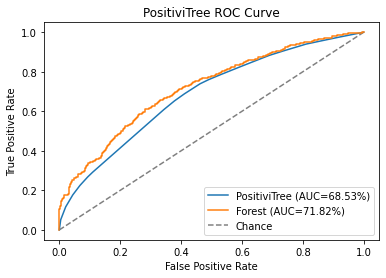

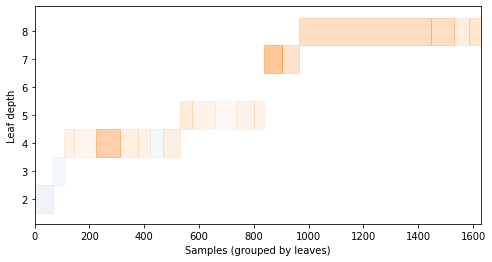

End.


In [3]:
%matplotlib inline

np.random.seed(42)
X, y = load_NHEFS_data()
y = y.replace({1: 0, 0: 1})

ptree = PositiviTree(X, y,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

# sns.pairplot(X.astype(float).join(y), hue=y.name)
# X_reduce = TSNE().fit_transform(X)
# plot_data(X_reduce, y, violating_samples)
# plt.figure()

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree)

# visualize_leaves_static(ptree, mix_colors=False)
# visualization_data = visualize_leaves_interactive(ptree, mix_colors=True)
# visualization_data = visualize_leaves_interactive(ptree)

# plt.figure()
# plt.hist(counts)

print("End.")

In [4]:
visualization_data = visualize_leaves_interactive(ptree)

In [5]:
visualization_data

Figure(id='1168', ...)

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

df = pd.read_csv('../data/fp_injectables_data.csv')
encoding = pd.read_csv('../data/encoding.csv')

y = df['outcome'] * 1
a = df['treatment'] * 1
X = df[df.columns[:-2]]
X = X.apply(lambda x: x.fillna(x.median()),axis='rows')

# Select and Encode ordinal features
v = encoding[encoding['encoding'] == 'O']['var_name'].values
enc = OrdinalEncoder()
ord_data = enc.fit_transform(X[v])
ord_features = v

# Select and Encode nominal features
v = encoding[encoding['encoding'] == 'L']['var_name'].values
j = X[v].astype(int)
enc = OneHotEncoder(categories='auto')
nom_data = enc.fit_transform(j.astype(int))
nom_features = enc.get_feature_names(v)

# Select the discrete features
v = encoding[encoding['encoding'] == 'N']['var_name'].values
dis_data = X[v].values
dis_features = v

# Combine all the features
X_arr = np.concatenate((ord_data, nom_data.toarray(), dis_data), axis=1)
features_names = np.concatenate((ord_features, nom_features, dis_features))

print(X_arr.shape)
X_df = pd.DataFrame(X_arr, columns=features_names)

(5649, 317)


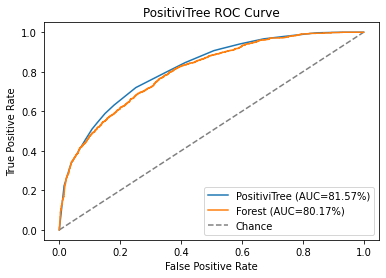

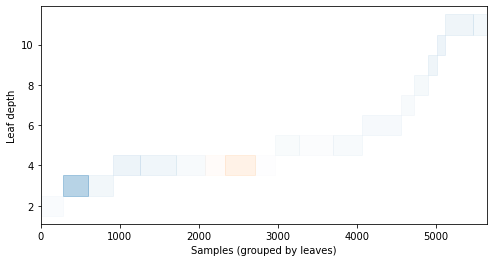

End.


In [27]:
ptree = PositiviTree(X_df, a,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_full = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='positivitree_viz_full.html')

print("End.")

In [28]:
X_df_ = X_df[X_df['v312_3'] == 0]
y_ = y[X_df['v312_3'] == 0]
a_ = a[X_df['v312_3'] == 0]

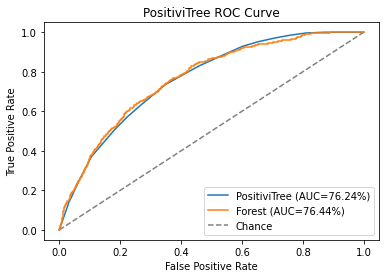

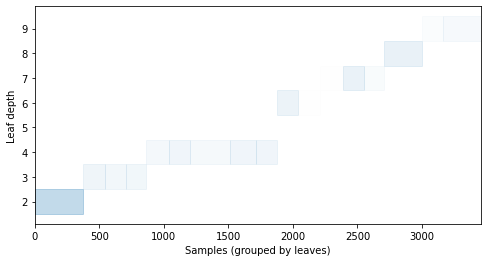

End.


In [29]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_0 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='positivitree_viz_0.html')

print("End.")

In [30]:
X_df_ = X_df[X_df['v312_3'] == 1]
y_ = y[X_df['v312_3'] == 1]
a_ = a[X_df['v312_3'] == 1]

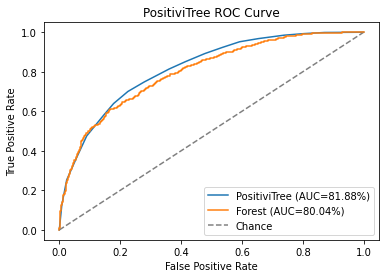

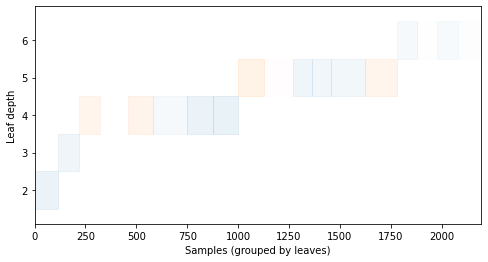

End.


In [31]:
ptree = PositiviTree(X_df_, a_,
                     violation_cutoff=0.1, consistency_cutoff=0.6,
                     n_consistency_tests=200, relative_violations=False,
                     # search_kws={"n_iter": 200},
                     dtc_kws={"criterion": "entropy"},
                     rfc_kws={"max_features": "auto"}
                     )

flagged_leaves = ptree._flag_out_leaves()
violating_samples = ptree._get_violating_samples_mask()
counts = ptree._count_violating_samples_in_forest(normalize=True)
tree_json_1 = ptree.export_tree()
scores = ptree.evaluate_fit(plot_roc=True)

ax = visualize_leaves_static(ptree)
visualization_data = visualize_leaves_interactive(ptree, output_path='positivitree_viz_1.html')

print("End.")